# Trabalho Prático: Problema da Mochila (Bin Packing) com DEAP

Nome: Ricardo Coutinho Cordeiro

Professor: Ulisses Brisolara Corrêa


# DEAP Introdução
---
![image](https://deap.readthedocs.io/en/master/_images/deap_long.png)

* Distributed Evolutionary Algorithm in Python  is a evolutionary computation framework for rapid prototyping and testing of ideas.

* [DEAP](https://github.com/DEAP/deap) (Distributed Evolutionary Algorithm in Python) é um framework de computação evolutiva para prototipagem rápida e teste de ideias.

## Material Teórico Algoritmos Genéticos

* Youtube: [Genetic Algorithms by Example](https://www.youtube.com/watch?v=uQj5UNhCPuo)

* Medium: [Genetic Algorithms From Theory to Practice](https://medium.com/@atbender/from-theory-to-practice-designing-genetic-algorithms-to-solve-complex-optimization-problems-cbb2ae44296)

* Book: [Introduction to Genetic Algorithms -- Melanie Mitchell](https://www.boente.eti.br/fuzzy/ebook-fuzzy-mitchell.pdf)


## Instalando DEAP

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.1 MB/s eta 0:00:00


In [ ]:
import warnings

# Estamos suprimindo um warning do DEAP que pode dificultar a visualização dos resultados
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from functools import partial

# Exercício

Você deve criar um algoritmo genético para resolver uma instância do problema da mochila. Cada indivíduo representa uma solução potencial para o problema, onde o objetivo é maximizar o valor total dos itens na mochila sem exceder a capacidade máxima.



- Capacidade da Mochila: 1000 unidades.

- Cada item tem um peso e um valor associados.

- Instância do problema a ser resolvida pode ser encontrada aqui.



Representação de um indivíduo. Cada indivíduo é representado por uma lista binária de tamanho igual ao número de itens. O valor 1 na posição i indica que o item i está na mochila, e 0 indica que não está.



Avaliação da Fitness. A função de fitness deve calcular o valor total dos itens na mochila e penalizar soluções que excedem a capacidade máxima.

---

Sobre o algoritmo. O algoritmo deve incluir pelo menos duas populações que trocam pelo menos um indivíduo a cada X gerações. Além disso, deve-se apresentar gráficos da fitness das gerações das duas populações, demarcando onde houve troca de indivíduos. Cada população deve ter os seus próprios operadores genéticos (seleção, mutação, crossover).



Requisitos:

   - Utilizar a biblioteca DEAP para implementar o algoritmo genético e resolver o problema da mochila.

   - Implementar a troca de pelo menos um indivíduo entre as populações a cada X gerações (os alunos são encorajados a testar diferentes valores de X).

   - Apresentar gráficos mostrando a evolução da fitness nas duas populações.

   - Demarcar nos gráficos os pontos onde houve troca de indivíduos entre as populações.

**Entrega**: Submeter o código fonte com gráficos e relatório, e apresentar ao professor em aula.

In [ ]:
capacidade_mochila = 1000
tamanho_populacao = 100
taxa_mutacao = 0.05
num_geracoes = 1000
intervalo_troca = 100
random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# with open('/content/drive/MyDrive/Colab Notebooks/knapsack/knapsack.txt', 'r') as f:
#     print(f.read())

# Ler os Itens do Arquivo

def ler_itens_do_arquivo(caminho_arquivo):
    itens = []
    with open(caminho_arquivo, 'r') as arquivo:
        linhas = arquivo.readlines()[1:]
        for linha in linhas:
            valor, peso = map(int, linha.split())
            itens.append({"peso": peso, "valor": valor})
    return itens

itens = ler_itens_do_arquivo('/content/drive/MyDrive/Colab Notebooks/knapsack/knapsack.txt')

In [ ]:
def configurar_deap():
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individuo", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("atributo_bool", random.randint, 0, 1)
    toolbox.register("individuo", tools.initRepeat, creator.Individuo, toolbox.atributo_bool, n=len(itens))
    toolbox.register("populacao", tools.initRepeat, list, toolbox.individuo)
    toolbox.register("avaliar", avaliar)
    toolbox.register("cruzar", tools.cxOnePoint)
    toolbox.register("mutar", tools.mutFlipBit, indpb=taxa_mutacao)
    toolbox.register("selecionar", tools.selTournament, tournsize=3)
    return toolbox

In [ ]:
def avaliar(individuo):
    peso_total = sum(individuo[i] * itens[i]['peso'] for i in range(len(individuo)))
    valor_total = sum(individuo[i] * itens[i]['valor'] for i in range(len(individuo)))
    if peso_total > capacidade_mochila:
        return valor_total / 10,
    return valor_total,

In [ ]:
def evolve_population(toolbox, population, generations, exchange_interval=None, other_population=None):
    fitness_values = []
    for gen in range(generations):
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=mutation_rate)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit

        population[:] = toolbox.select(offspring + population, k=len(population))

        best_ind = tools.selBest(population, k=1)
        if best_ind:
            fitness_values.append(best_ind[0].fitness.values[0])

        if exchange_interval and other_population and gen % exchange_interval == 0:
            exchange_individual(population, other_population)

    return population, fitness_values

def evoluir_populacao(caixa_ferramentas, populacao, geracoes, intervalo_troca=None, outra_populacao=None):
    valores_fitness = []
    for ger in range(geracoes):
        descendentes = algorithms.varAnd(populacao, caixa_ferramentas, cxpb=0.5, mutpb=taxa_mutacao)
        aptidoes = caixa_ferramentas.map(caixa_ferramentas.avaliar, descendentes)
        for aptidao, ind in zip(aptidoes, descendentes):
            ind.fitness.values = aptidao

        populacao[:] = caixa_ferramentas.selecionar(descendentes + populacao, k=len(populacao))

        melhor_ind = tools.selBest(populacao, k=1)
        if melhor_ind:
            valores_fitness.append(melhor_ind[0].fitness.values[0])

        if intervalo_troca and outra_populacao and ger % intervalo_troca == 0:
            trocar_individuos(populacao, outra_populacao)

    return populacao, valores_fitness

In [ ]:
def exchange_individual(pop1, pop2):
    ind1 = tools.selBest(pop1, k=1)[0]
    ind2 = tools.selBest(pop2, k=1)[0]
    pop1[random.randint(0, len(pop1)-1)] = ind2
    pop2[random.randint(0, len(pop2)-1)] = ind1

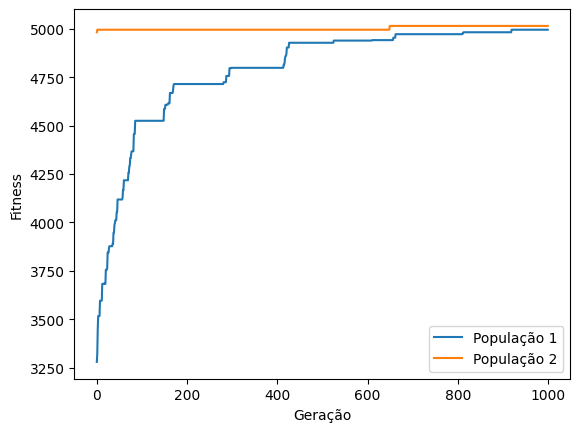

Melhor solução População 1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] (5014.4,)
Melhor solução População 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] (5014.4,)


In [ ]:
def main():
    toolbox = setup_deap()

    pop1 = toolbox.population(n=population_size)
    pop2 = toolbox.population(n=population_size)

    pop1, fitness_values1 = evolve_population(toolbox, pop1, num_generations, exchange_interval, pop2)
    pop2, fitness_values2 = evolve_population(toolbox, pop2, num_generations, exchange_interval, pop1)

    plt.plot(fitness_values1, label='População 1')
    plt.plot(fitness_values2, label='População 2')
    plt.xlabel('Geração')
    plt.ylabel('Fitness')
    plt.legend()
    plt.show()

    if pop1:
        best_ind1 = tools.selBest(pop1, k=1)[0]
        print("Melhor solução População 1:", best_ind1, evaluate(best_ind1))
    else:
        print("População 1 está vazia.")

    if pop2:
        best_ind2 = tools.selBest(pop2, k=1)[0]
        print("Melhor solução População 2:", best_ind2, evaluate(best_ind2))
    else:
        print("População 2 está vazia.")

if __name__ == "__main__":
    main()